In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage, compute_usage
%matplotlib inline
import datetime
from aging.plotting import figure, save_factory, PlotConfig, format_plots, ONTOGENY_AGE_CMAP, add_identity, legend

In [2]:
format_plots()
c = PlotConfig()

In [3]:
from matplotlib.colors import LinearSegmentedColormap
# Define the color map
colors = ['#dadaeb','#6a51a3']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cml=custom_cmap


# prepare colors for plot
colors = ['#dadaeb','#6a51a3']
import matplotlib
cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
matplotlib.cm.register_cmap("dana", cmap)
pl = sns.color_palette("dana", n_colors=27)

/tmp/ipykernel_9304/687843014.py:12: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  matplotlib.cm.register_cmap("dana", cmap)


In [4]:
## update data
def filter_df(df):
    max=39
    thresh=8
    syll=df.columns.values[df.columns.values>max]
    df.drop(syll,axis=1, inplace=True)
    age_counts = df.index.get_level_values('age').value_counts()
    ages_greater = list(age_counts[age_counts > thresh].index)
    return df.loc[data.index.get_level_values('age').isin(ages_greater)]

In [5]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_males_relabeled_usage_matrix_v00.parquet')
df = pd.read_parquet(path)

In [6]:
# arrange data
data = df.astype(float, errors='ignore')
data= filter_df(data).groupby(['age','uuid','mouse']).mean()
data = data.query('age<100')
data_all = data[sorted(data.columns)].copy()

In [7]:
df_indv=data_all.groupby(['mouse','age']).mean()

<Axes: >

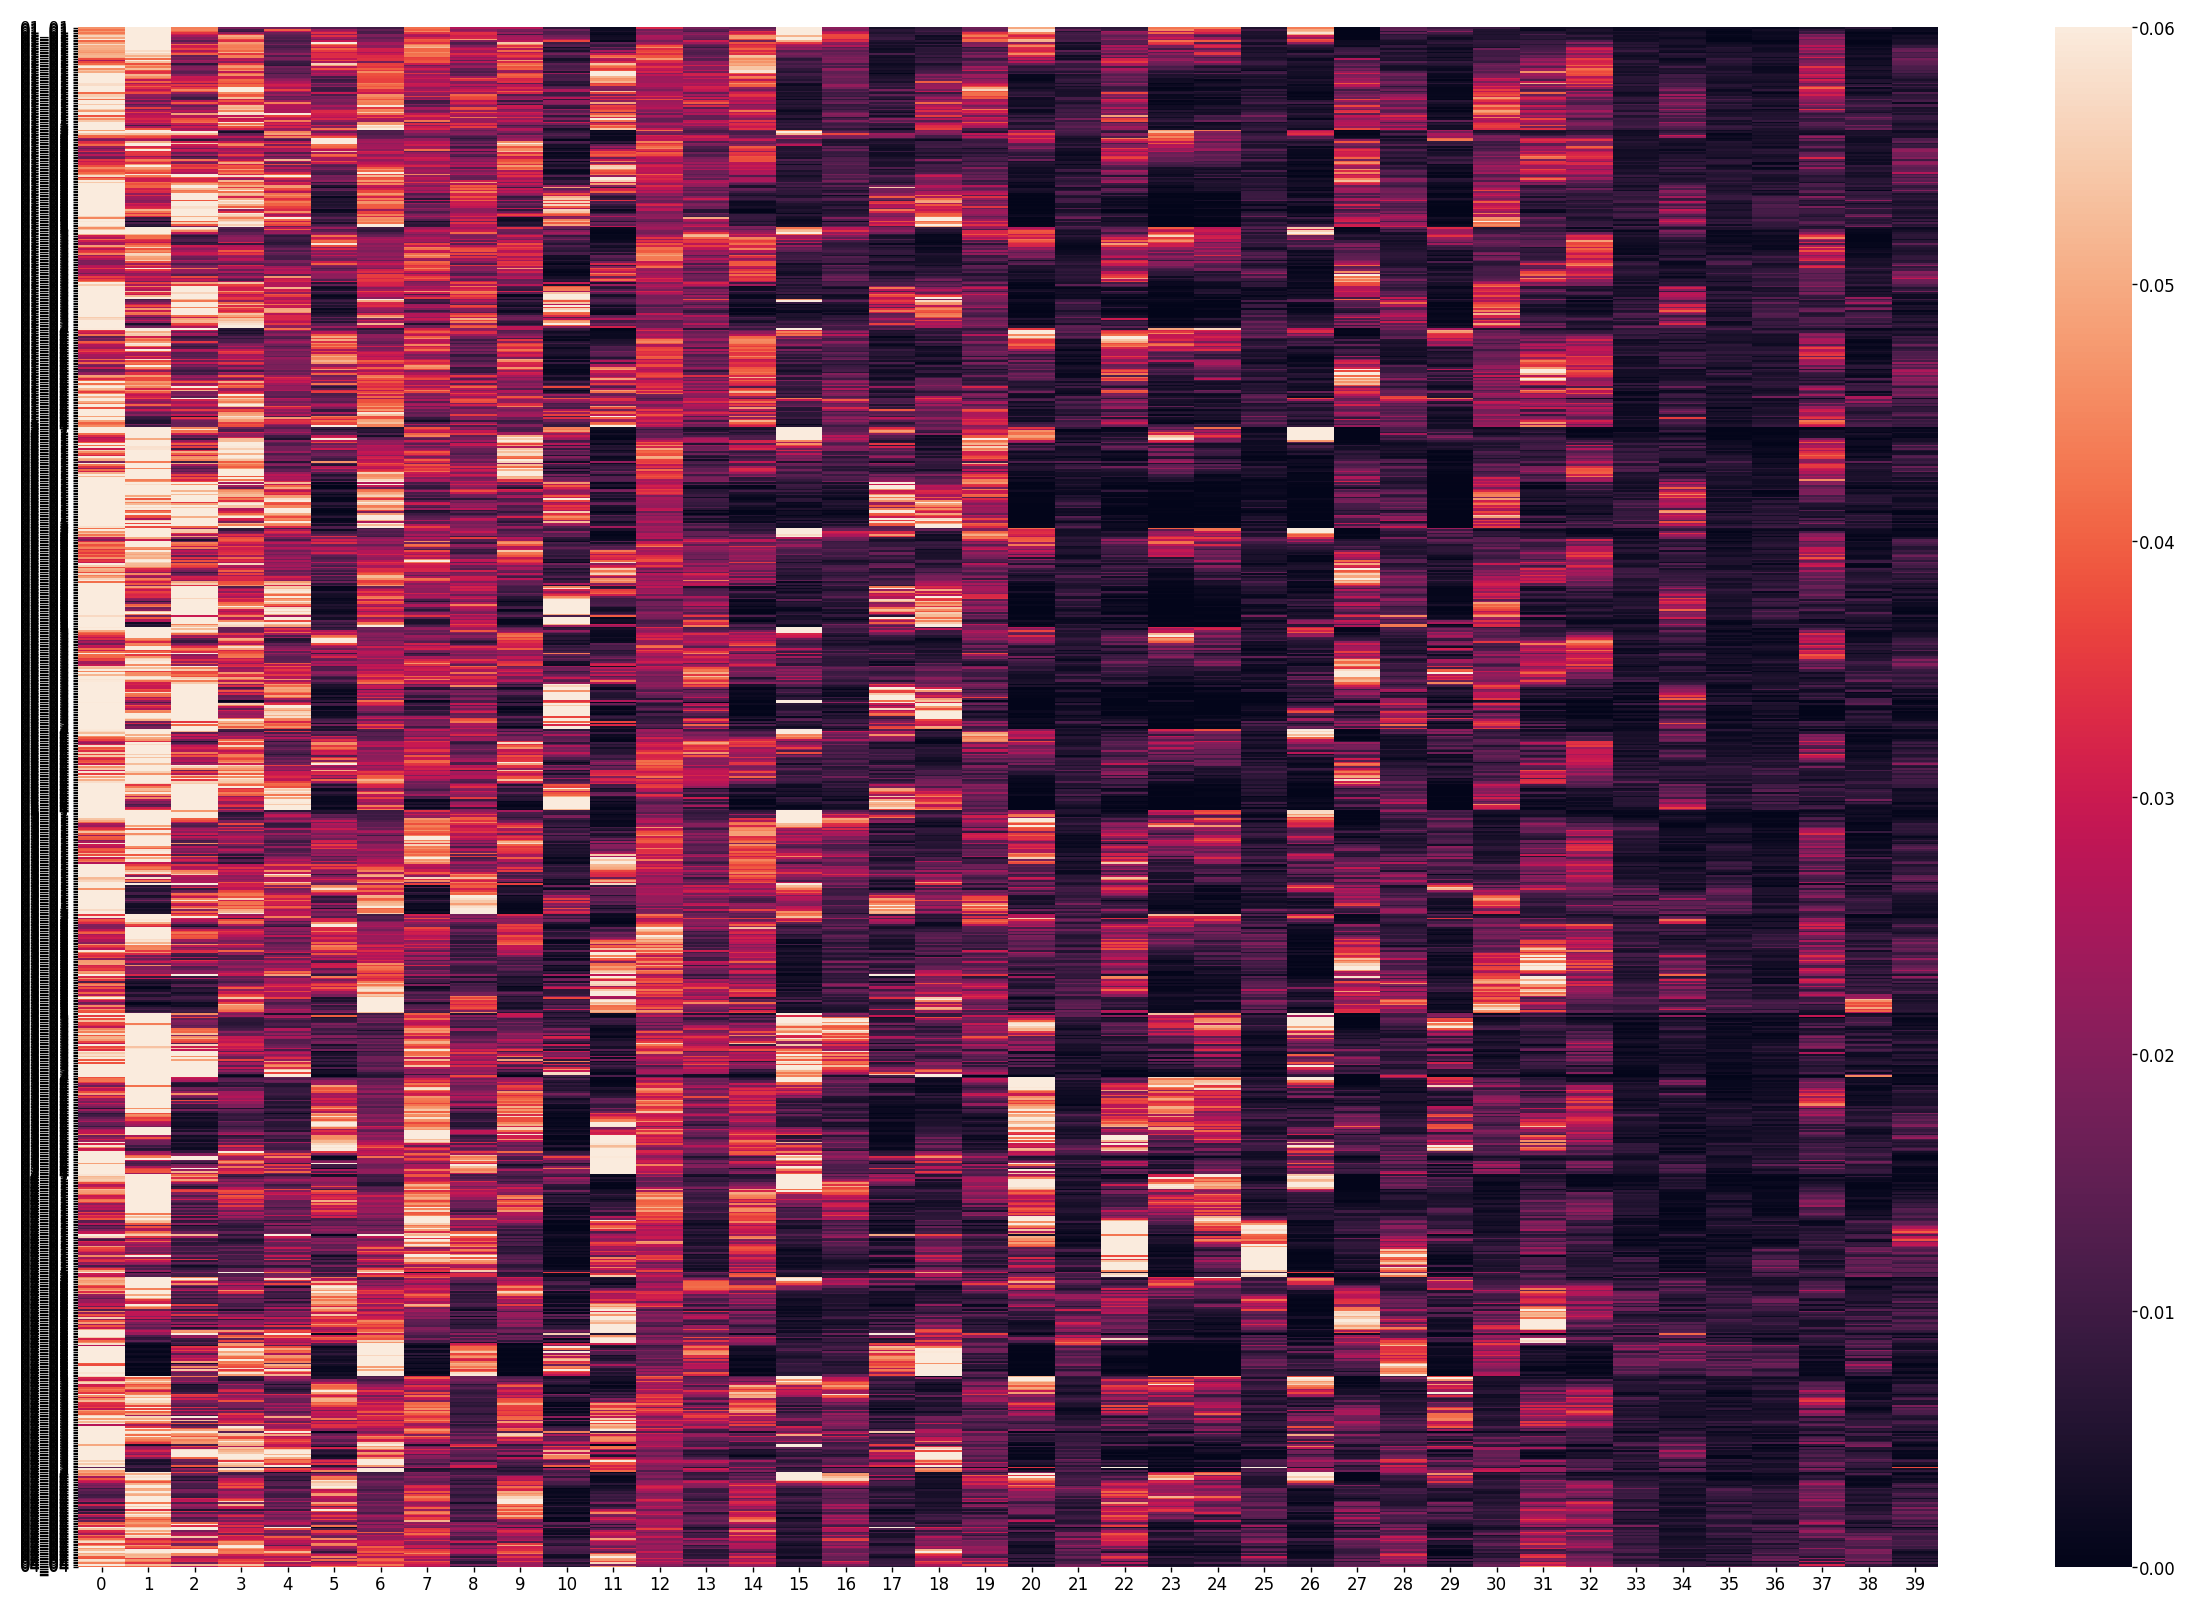

In [8]:
# syllbles by age males
data= df_indv.copy()
data_labels = data.index.get_level_values(0).to_numpy()
data= data.to_numpy()
fig, ax = plt.subplots()
fig.set_size_inches(15,10) 
sns.heatmap(data,vmax=0.06,yticklabels=data_labels)

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


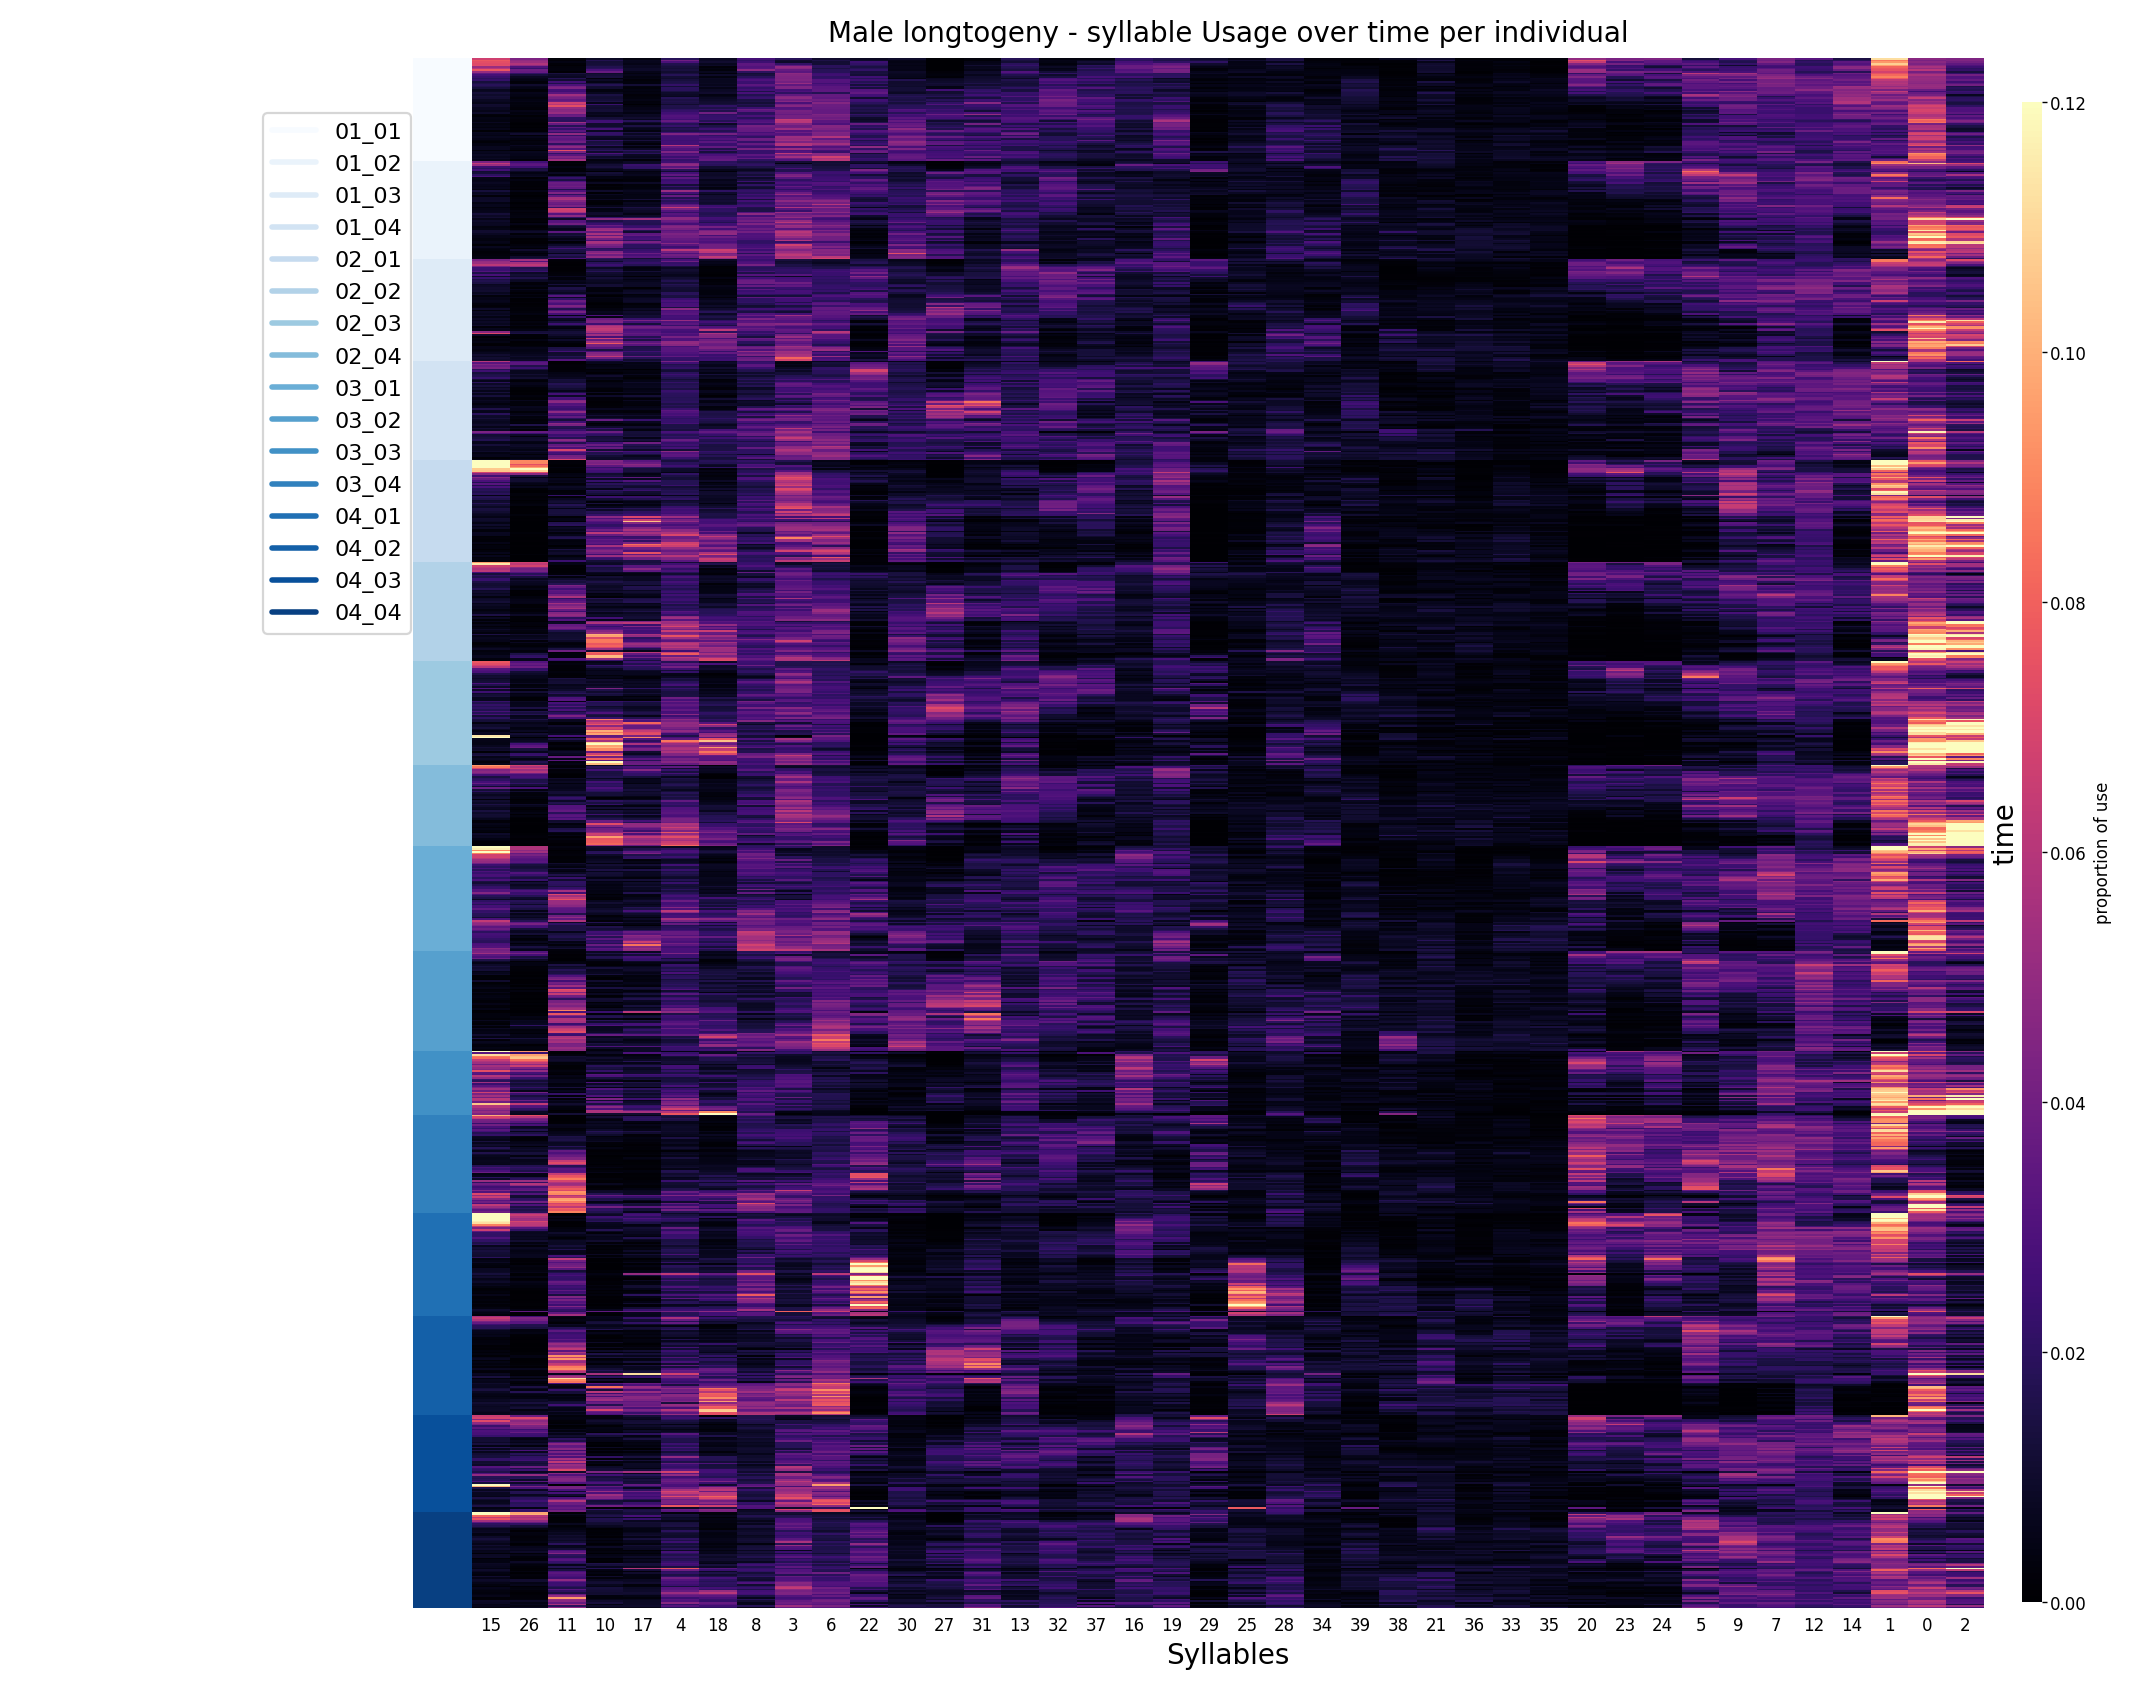

In [9]:
# plot Males
cmap2 = mpl.cm.Blues
ages = np.unique(data_labels)
colors = np.arange(0, 256, math.ceil(256/len(ages)))
seqmatcolor='magma'

# create age labels colors
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        #n=n+1
        #print(n)
        color_mat.append(cmap2(c))

# plot syllable usage acoss time points
cg=sns.clustermap(data=data,cmap=seqmatcolor, 
                   xticklabels=1,
                   figsize=(10, 10),
                   row_colors=color_mat,
                   #colors_ratio=0.02,
                   cbar_pos=(1.01, 0.025, 0.01, .75),
                   col_cluster=True,
                   row_cluster=None,
                   yticklabels=False,
                   #xticklabels=False,
                   method='average',metric='sqeuclidean',
                   cbar_kws={'label': 'proportion of use'}, 
                   vmax=0.12)
cg.ax_col_dendrogram.set_visible(False)
s=cg.dendrogram_col.reordered_ind #reordered columns of the matrix
ax = cg.ax_heatmap
ax.tick_params(left=False, bottom=False, right=False)

lines=[]
# legend
for i,c in enumerate(colors):
        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))

ax.set_xlabel('Syllables',fontsize=10)
ax.set_ylabel('time',fontsize=10)
ax.set_title('Male longtogeny - syllable Usage over time per individual', fontsize=10)
plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(-80, 1),loc='upper right',fontsize=8)
plt.show()
#cg.savefig(data_loc +'ontogeny_syllable_Distribution.pdf', bbox_inches='tight')

/tmp/ipykernel_9304/263824853.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(4, 4, n + 1)


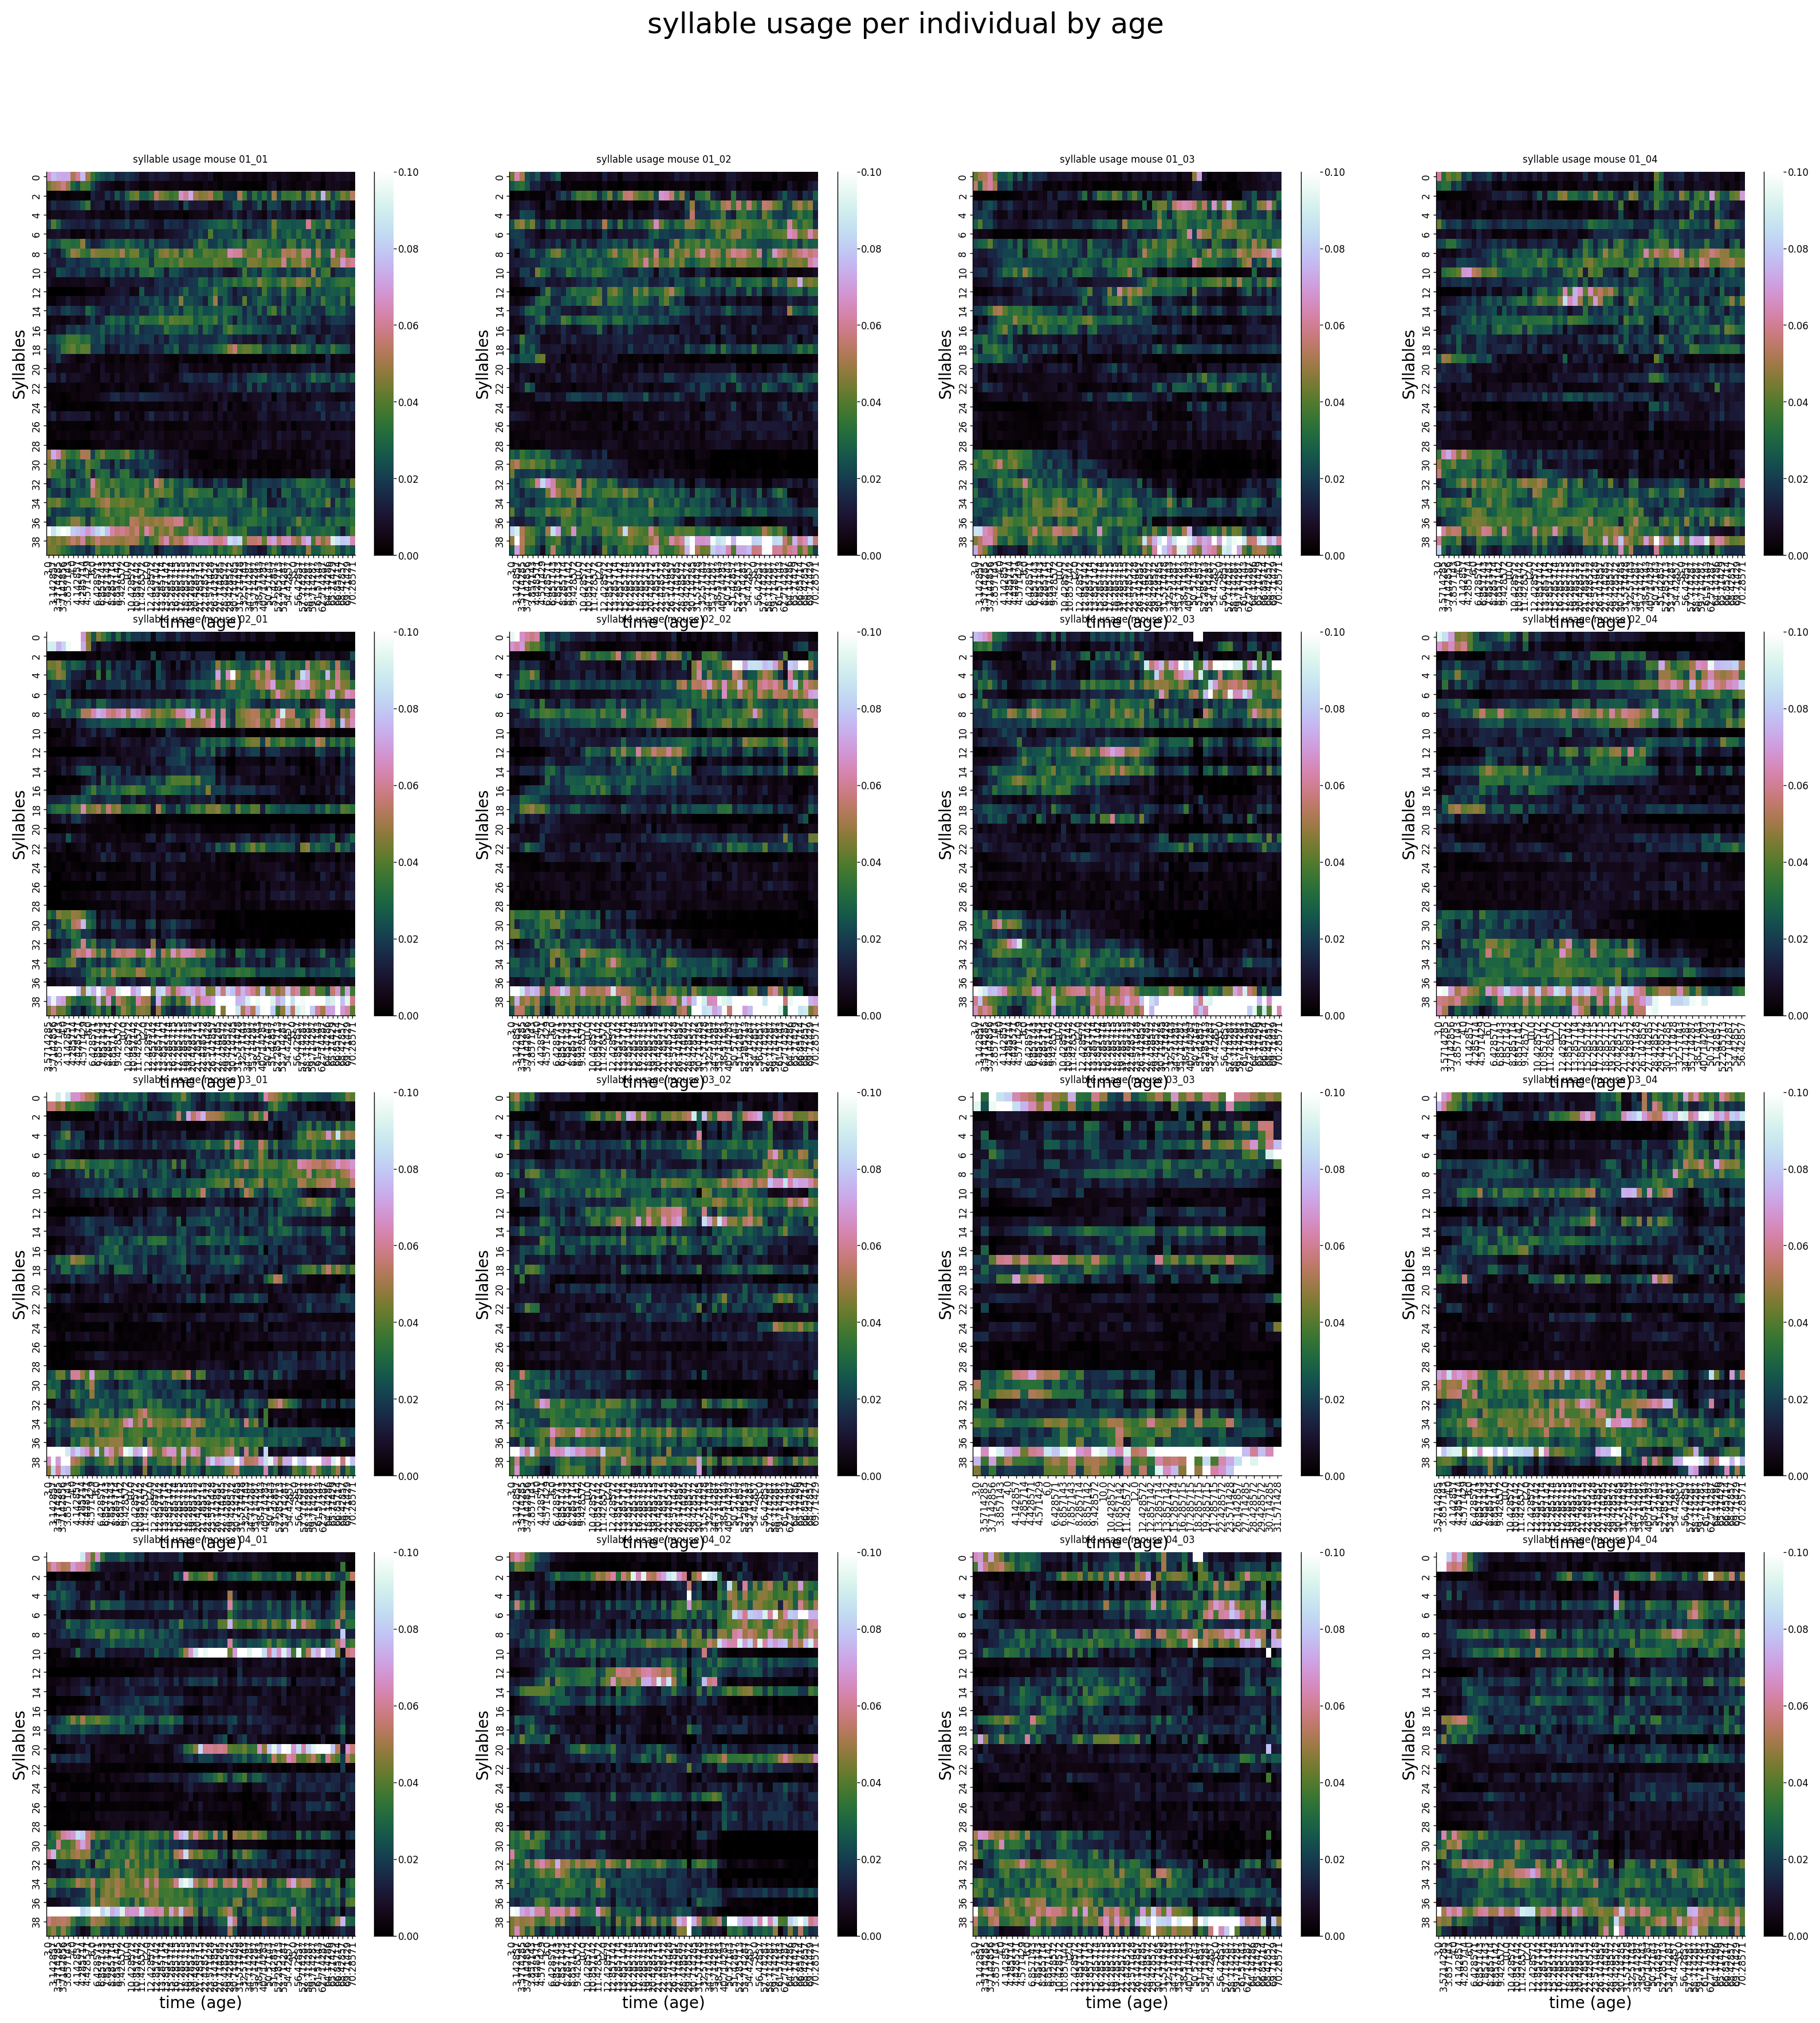

In [13]:
# for males
#plt.figure(figsize=(20, 20))
#plt.subplots_adjust(hspace=0.5)

fig, ax = plt.subplots()
fig.set_size_inches(20,20)
#plt.subplots_adjust(hspace=0.5)

plt.suptitle("syllable usage per individual by age", fontsize=18, y=0.95)

n=0
for mouse,_df in enumerate(df_indv.groupby('mouse')):
    m=_df[0]
    ages = _df[1].index.get_level_values(1).to_numpy()
    data_temp = _df[1].to_numpy()[:,s]
    ax = plt.subplot(4, 4, n + 1)
    sns.heatmap(data_temp.T,cmap = 'cubehelix',vmax=0.1, xticklabels= ages)
    ax.set_title('syllable usage mouse ' + str(m))
    ax.set_ylabel('Syllables',fontsize=10)
    ax.set_xlabel('time (age)',fontsize=10)
    #ax.set_ylim(0,0.12)
    #ax = plt.subplot(10, 7, n + 1)
    #sns.heatmap(kld_temp,ax=ax, vmax=1.0)
    n=n+1
sns.despine()
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig4"/ 'indv_syllable_usage_over_life_heatmaps.pdf')